In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetes_df = pd.read_csv( "HBA1C_Report_YESH.csv", sep = ",",encoding = "ISO-8859-1")

In [3]:
diabetes_df.head( 3 )


,patientid,visitno,patientfirstname,DOB,primarydoctorname,sampleid,createddate,Testcodeparameters,result,rangedescription
0,YESH-0000151722,O0000000002-YESH,MINARA BEGUM,05-07-1984 00:00,self,Y000000100,19-08-2012 16:35,HBA1C,6.0,4.6 - 6.2%
1,YESH-0000152178,V0000000001-YESH,DAVID MESHACH S,11-12-1951 00:00,NISHANTH HIREMATH S,Y000000104,19-08-2012 16:36,HBA1C,8.5,4.6 - 6.2%
2,YESH-0000151658,O0000000002-YESH,PARIJAT DAS,30-03-1967 00:00,self,Y000000115,19-08-2012 16:37,HBA1C,8.5,4.6 - 6.2%


In [4]:
diabetes_df.shape

(54792, 10)

In [5]:
diabetes_df.dtypes

patientid             object
visitno               object
patientfirstname      object
DOB                   object
primarydoctorname     object
sampleid              object
createddate           object
Testcodeparameters    object
result                object
rangedescription      object
dtype: object

In [6]:
diabetes_df['createddate'] = pd.to_datetime(diabetes_df['createddate'])
diabetes_df['DOB'] = pd.to_datetime(diabetes_df['DOB'])
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54792 entries, 0 to 54791
Data columns (total 10 columns):
patientid             54792 non-null object
visitno               54792 non-null object
patientfirstname      54792 non-null object
DOB                   54792 non-null datetime64[ns]
primarydoctorname     46826 non-null object
sampleid              54792 non-null object
createddate           54792 non-null datetime64[ns]
Testcodeparameters    54792 non-null object
result                54788 non-null object
rangedescription      54641 non-null object
dtypes: datetime64[ns](2), object(8)
memory usage: 4.2+ MB


In [7]:
diabetes_df.isnull().sum(axis=0)

patientid                0
visitno                  0
patientfirstname         0
DOB                      0
primarydoctorname     7966
sampleid                 0
createddate              0
Testcodeparameters       0
result                   4
rangedescription       151
dtype: int64

In [8]:
diabetesPatient = diabetes_df[['patientfirstname','DOB','patientid']].copy()
diabetesPatient = diabetesPatient.groupby(['patientfirstname','DOB']).count()


In [9]:
import warnings
warnings.filterwarnings('ignore')

diabetesPatient.sort_index(by=['patientid'],ascending=False).to_csv('DiabetesGrouping.csv', sep=',', encoding='utf-8')


In [10]:
diabetes_df.sort_values(by=['patientfirstname','DOB','createddate'],ascending=False, inplace=True)


In [61]:
diabetes_df_copy = pd.DataFrame(columns=diabetes_df.columns)
diabetes_df_copy["prediabetesdate"] = ""
diabetes_df_copy["prediabetesresult"] = ""

In [62]:
groupKey = diabetes_df.iloc[0]['patientfirstname'] + row['patientid'] + str(diabetes_df.iloc[0]['DOB'])

In [63]:
diabetes_df_copy.shape

(0, 12)

In [64]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [65]:
from datetime import datetime
from dateutil import relativedelta

foundDiabetic = False
foundPreDiabetic = False
found1 = False
found2 = False
foundRecord = False
diabeticRow = ""
found1Row = ""
found2Row = ""
f1Row = ""
f2Row = ""


In [66]:
for index, row in diabetes_df.iterrows():
    currentKey = row['patientfirstname'] + row['patientid'] + str(row['DOB'])
    if currentKey != groupKey:
        groupKey = currentKey
        
        if foundRecord == False and found1 == True and found2 == True:
            found1Row = pd.Series.to_frame(f1Row).T
            found2Row = pd.Series.to_frame(f2Row).T
            
            found1Row["prediabetesdate"] = f2Row['createddate']
            found1Row["prediabetesresult"] = f2Row['result']
            difference = relativedelta.relativedelta(f1Row['createddate'], f1Row['DOB'])
            age =  float(difference.years)
            found1Row["age"] = age
            found1Row["agegroup"] = ""
            
            if age >= 18 and age <= 29:
               found1Row["agegroup"] = "18-29"
            if age >= 30 and age <= 39:
               found1Row["agegroup"] = "30-39"
            if age >= 40 and age <= 50:
               found1Row["agegroup"] = "40-50"
            if age >= 51:
               found1Row["agegroup"] = "51+"
            found1Row["isdiabetic"] = 0
            diabetes_df_copy = diabetes_df_copy.append(found1Row)
        
        foundDiabetic = False
        foundPreDiabetic = False
        found1 = False
        found2 = False
        foundRecord = False
        
    if isfloat(row['result']):
        
        if found1 == True and found2 == False and float(row['result']) > 5.6 and float(row['result']) < 6.5:
            f2Row = row
            found2 = True
        
        if found1 == False:
            f1Row = row
            found1 = True
            

        
        if float(row['result']) >= 6.5 and foundDiabetic == False:
            foundDiabetic = True
            diabeticRow = pd.Series.to_frame(row).T
            diabeticRow["isdiabetic"] = 1

        if float(row['result']) > 5.6 and float(row['result']) < 6.5 and foundDiabetic == True and foundPreDiabetic == False:
            foundPreDiabetic = True
            diabeticRow["prediabetesdate"] = row['createddate']
            diabeticRow["prediabetesresult"] = row['result']
            difference = relativedelta.relativedelta(row['createddate'], row['DOB'])
            age =  float(difference.years)
            diabeticRow["age"] = age
            diabeticRow["agegroup"] = ""
            
            if age >= 18 and age <= 29:
               diabeticRow["agegroup"] = "18-29"
            if age >= 30 and age <= 39:
               diabeticRow["agegroup"] = "30-39"
            if age >= 40 and age <= 50:
               diabeticRow["agegroup"] = "40-50"
            if age >= 51:
               diabeticRow["agegroup"] = "51+"
            
            diabetes_df_copy = diabetes_df_copy.append(diabeticRow) 
            foundRecord = True

In [83]:
diabetes_df_copy['result'] = pd.to_numeric(diabetes_df_copy['result'])
diabetes_df_copy['prediabetesresult'] = pd.to_numeric(diabetes_df_copy['prediabetesresult'])

In [84]:
diabetes_df_copy.shape

(2660, 15)

In [85]:
diabetes_df_copy.to_csv('DiabetesClean.csv', sep=',', encoding='utf-8')

In [86]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [87]:
diabetes_df_copy.describe()

,age,isdiabetic,prediabetesresult,result
count,2660.000000,2660.000000,2660.000000,2660.000000
mean,55.449624,0.365038,6.054098,6.423647
std,14.260435,0.481531,0.233170,1.666043
min,7.000000,0.000000,5.700000,4.000000
25%,45.000000,0.000000,5.800000,5.800000
50%,55.000000,0.000000,6.100000,6.200000
75%,66.000000,1.000000,6.300000,6.700000
max,99.000000,1.000000,6.400000,72.000000


In [88]:

pd.crosstab( diabetes_df_copy.agegroup, diabetes_df_copy.isdiabetic)

isdiabetic,0.0,1.0
agegroup,,
,2,2
18-29,56,16
30-39,213,93
40-50,431,218
51+,987,642


In [89]:
pd.crosstab( diabetes_df_copy.agegroup, diabetes_df_copy.isdiabetic, normalize = "index")

isdiabetic,0.0,1.0
agegroup,,
,0.500000,0.500000
18-29,0.777778,0.222222
30-39,0.696078,0.303922
40-50,0.664099,0.335901
51+,0.605893,0.394107


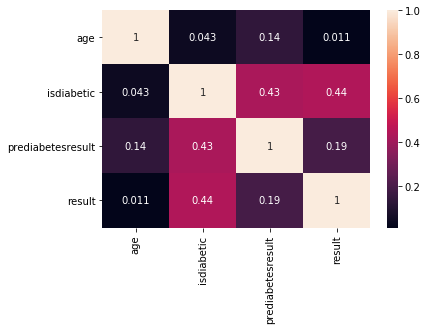

In [90]:
sn.heatmap( diabetes_df_copy.corr(), annot=True );

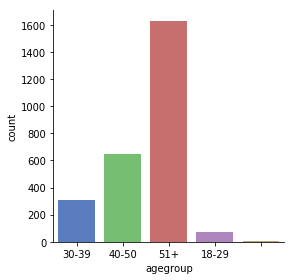

In [91]:
sn.factorplot(x="agegroup", data=diabetes_df_copy,
               size=4, kind="count", palette="muted")

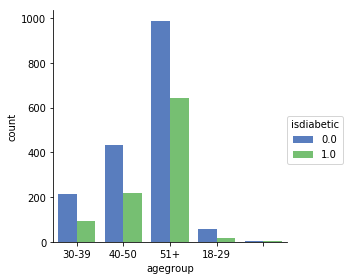

In [75]:
sn.factorplot(x="agegroup", hue = 'isdiabetic', data=diabetes_df_copy,
               size=4, kind="count", palette="muted")

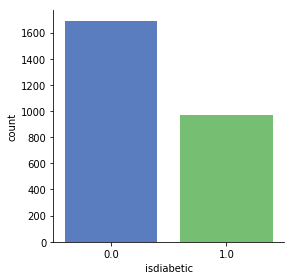

In [76]:
sn.factorplot(x="isdiabetic", data=diabetes_df_copy,
               size=4, kind="count", palette="muted")

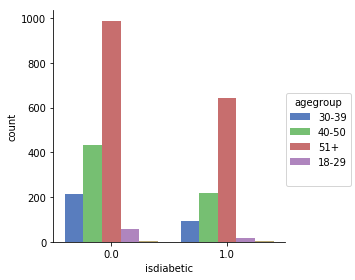

In [77]:
sn.factorplot(x="isdiabetic", hue = 'agegroup', data=diabetes_df_copy,
               size=4, kind="count", palette="muted")

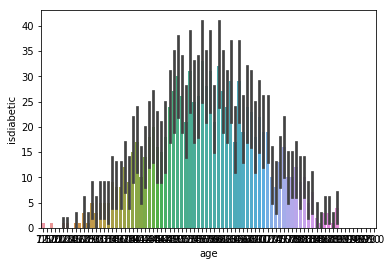

In [78]:
sn.barplot( x = 'age',
         y = 'isdiabetic',
         data = diabetes_df_copy,
         estimator = sum )